# Visualización de datos

1. Visualizar datos

<img src='https://raw.githubusercontent.com/cortizbon/images_/main/images.png' width=700>


2. Coordinar sistemas y ejes
3. Escalas de color

**El color como una herramienta para distinguir**

<img src='https://raw.githubusercontent.com/cortizbon/images_/main/color1.png' width=500>

**Colores para representar valores de los datos**

<img src='https://raw.githubusercontent.com/cortizbon/images_/main/color3.png' width=500>

**Pueden ser datos geográficos**

<img src='https://raw.githubusercontent.com/cortizbon/images_/main/color2.png' width=500>

**Colores como herramientas para resaltar algo**

<img src='https://raw.githubusercontent.com/cortizbon/images_/main/color4.png' width=500>


4. Directorio de visualizaciones
  - Cantidades
  - Distribuciones
  - Proporciones
  - Relaciones x-y
  - Datos geoespaciales
  - Incertidumbre


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

## Directorio de visualizaciones

### Cantidades

1. Gráficos de barras
2. Barras agrupadas y barras apiladas
3. Gráficos de puntos
4. Heatmaps

In [ ]:
!pip install wooldridge
import wooldridge as wd
wage = wd.data('wage1')

In [ ]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

#### Gráficos de barras

In [ ]:
fem = wage['female'].value_counts()
fem.index = ['m', 'f']

In [ ]:
fem

m    274
f    252
Name: female, dtype: int64

<BarContainer object of 2 artists>

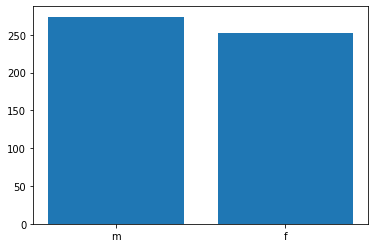

In [ ]:
plt.bar(fem.index, fem.values)

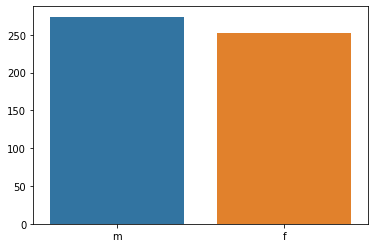

In [ ]:
sns.barplot(x=fem.index, y=fem.values)

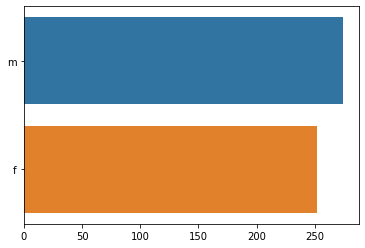

In [ ]:
sns.barplot(x=fem.values, y=fem.index, orient='h')

#### Barras agrupadas

In [ ]:
wage['educ_inter'] = pd.cut(wage['educ'], 5)

In [ ]:
wage['educ_inter']

In [ ]:
wage = wage.replace({'female':{1:'f',0:'m'}})

In [ ]:
wage['female'].value_counts()

m    274
f    252
Name: female, dtype: int64

In [ ]:
pivot = wage.pivot_table(values='wage',
                 index='educ_inter',
                 columns='female',
                 aggfunc='mean').stack().to_frame().reset_index().rename(columns={0:'mean_wage','female':'gender'})

In [ ]:
pivot

,educ_inter,gender,mean_wage
0,"(-0.018, 3.6]",f,3.530000
1,"(-0.018, 3.6]",m,3.335000
2,"(3.6, 7.2]",f,3.470000
3,"(3.6, 7.2]",m,4.057778
4,"(7.2, 10.8]",f,3.263333
5,"(7.2, 10.8]",m,4.830833
6,"(10.8, 14.4]",f,4.297674
7,"(10.8, 14.4]",m,6.764286
8,"(14.4, 18.0]",f,7.119750
9,"(14.4, 18.0]",m,9.172625


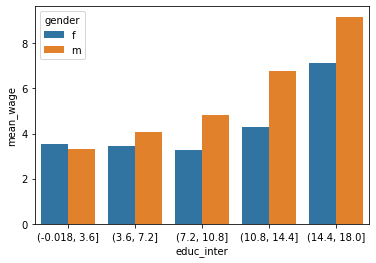

In [ ]:
sns.barplot(data=pivot, x='educ_inter',y='mean_wage',hue='gender')

#### Barras apiladas

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


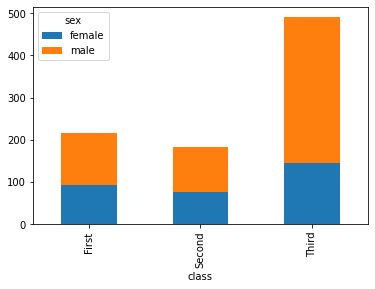

In [ ]:
(titanic.groupby(['sex','class'])['survived']
 .count()
 .reset_index()
 .pivot(index='class',values='survived',columns='sex')
 .plot(kind='bar',stacked=True))

#### Gráficos de puntos

In [ ]:
!pip install wbgapi
import wbgapi as wb

In [ ]:
wb.search('expectancy')

ID,Name,Field,Value
AUS~SP.DYN.LE00.IN,"Australia~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
AUT~SP.DYN.LE00.IN,"Austria~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
BEL~SP.DYN.LE00.IN,"Belgium~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
BGR~SP.DYN.LE00.IN,"Bulgaria~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
BLR~SP.DYN.LE00.IN,"Belarus~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
BMU~SP.DYN.LE00.IN,"Bermuda~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
CAN~SP.DYN.LE00.IN,"Canada~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
CHE~SP.DYN.LE00.IN,"Switzerland~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
CUW~SP.DYN.LE00.IN,"Curaçao~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy
CYM~SP.DYN.LE00.IN,"Cayman Islands~Life expectancy at birth, total (years)",Country-Series,Derived using male and female life expectancy


In [ ]:
wb.series.metadata.get('SP.DYN.LE00.IN')

Field,Value
Aggregationmethod,Weighted average
Developmentrelevance,"Mortality rates for different age groups (infants, children, and adults) and overall mortality indicators (life expectancy at birth or survival to a given age) are important indicators of health status in a country. Because data on the incidence and prevalence of diseases are frequently unavailable, mortality rates are often used to identify vulnerable populations. And they are among the indicators most frequently used to compare socioeconomic development across countries."
IndicatorName,"Life expectancy at birth, total (years)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Limitationsandexceptions,Annual data series from United Nations Population Division's World Population Prospects are interpolated data from 5-year period data. Therefore they may not reflect real events as much as observed data.
Longdefinition,Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.
Periodicity,Annual
Source,"(1) United Nations Population Division. World Population Prospects: 2019 Revision, or derived from male and female life expectancy at birth from sources such as: (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme."
Statisticalconceptandmethodology,"Life expectancy at birth used here is the average number of years a newborn is expected to live if mortality patterns at the time of its birth remain constant in the future. It reflects the overall mortality level of a population, and summarizes the mortality pattern that prevails across all age groups in a given year. It is calculated in a period life table which provides a snapshot of a population's mortality pattern at a given time. It therefore does not reflect the mortality pattern that a person actually experiences during his/her life, which can be calculated in a cohort life table. High mortality in young age groups significantly lowers the life expectancy at birth. But if a person survives his/her childhood of high mortality, he/she may live much longer. For example, in a population with a life expectancy at birth of 50, there may be few people dying at age 50. The life expectancy at birth may be low due to the high childhood mortality so that once a person survives his/her childhood, he/she may live much longer than 50 years."


In [ ]:
life_expect = wb.data.DataFrame('SP.DYN.LE00.IN', time=[2019], labels=True).reset_index(drop=True).rename(columns={'SP.DYN.LE00.IN':'expect'})
life_expect.head()

,Country,expect
0,Zimbabwe,61.490000
1,Zambia,63.886000
2,"Yemen, Rep.",66.125000
3,West Bank and Gaza,74.053000
4,Virgin Islands (U.S.),79.668293


In [ ]:
data = life_expect.sort_values(by='expect',ascending=False).iloc[:100:4,:]

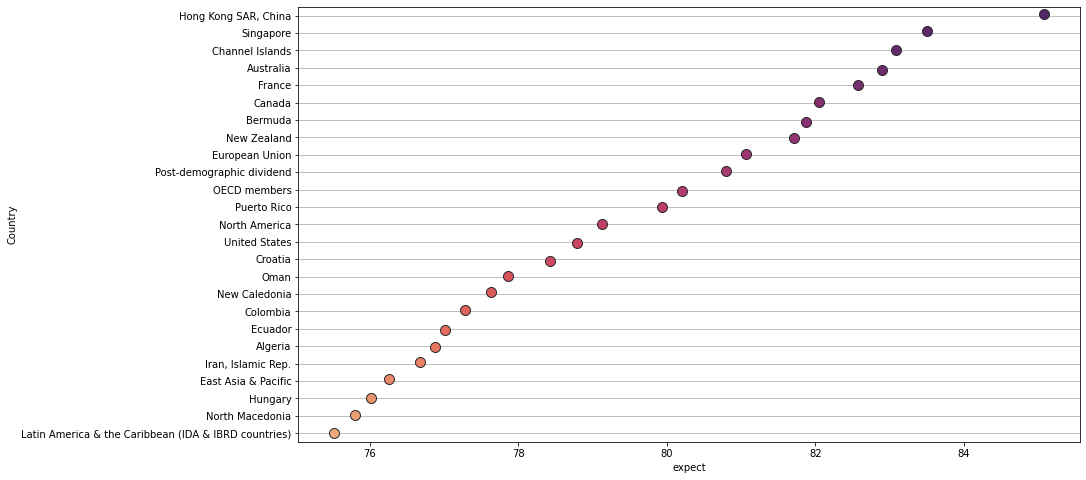

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.stripplot(x=data['expect'], y=data['Country'], orient='h',palette='flare_r', linewidth=1, size=10, ax=ax)
ax.xaxis.grid(False)
ax.yaxis.grid(True)

#### Heatmaps

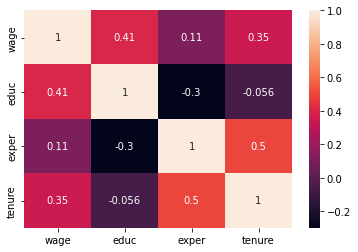

In [ ]:
#esto también es conocido como correlograma
df = wage[['wage','educ','exper','tenure']]
sns.heatmap(df.corr(), annot=True)

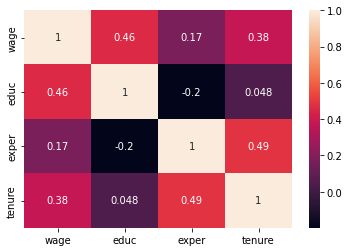

In [ ]:
df = wage[['wage','educ','exper','tenure']]
sns.heatmap(df.corr(method='spearman'), annot=True)

In [ ]:
wb.search('internet')

ID,Name,Field,Value
LBN~ST.INT.RCPT.CD,"Lebanon~International tourism, receipts (current US$)",Country-Series,"...tourism receipts concerning statistics on inbound tourism, the Department of “Internet and Statistics Service of the Ministry of Tourism” considers that a tourist..."
ID,Name,Field,Value
IT.BBD.USEC.CD,Fixed broadband sub-basket (US$ per month),Developmentrelevance,"... With the rapid development of mobile telephony and the global expansion of the Internet, information and communication technologies are increasingly recognized as..."
IT.CEL.COVR.ZS,Population covered by mobile cellular network (%),Developmentrelevance,"... With the rapid development of mobile telephony and the global expansion of the Internet, information and communication technologies are increasingly recognized as..."
IT.CEL.SETS,Mobile cellular subscriptions,Developmentrelevance,"... With the rapid development of mobile telephony and the global expansion of the Internet, information and communication technologies are increasingly recognized as..."
IT.CEL.SETS.P2,Mobile cellular subscriptions (per 100 people),Developmentrelevance,"... With the rapid development of mobile telephony and the global expansion of the Internet, information and communication technologies are increasingly recognized as..."
IT.FRN.OWNR.ZS,Foreign ownership (percentage allowed),Longdefinition,...permitted in facility-based and spectrum-based operators as well as in Internet Service Providers (ISPs) (as a percentage)....
IT.FRN.OWNR.ZS,Foreign ownership (percentage allowed),Shortdefinition,...permitted in facility-based and spectrum-based operators as well as in Internet Service Providers (ISPs) (as a percentage)....
IT.INT.CTRF.MN.PC,"International voice traffic, mobile cellular network (minutes per person)",Developmentrelevance,"... With the rapid development of mobile telephony and the global expansion of the Internet, information and communication technologies are increasingly recognized as..."
IT.INT.MTRF.MN.PC,"International voice traffic, fixed (minutes per person)",Developmentrelevance,"... With the rapid development of mobile telephony and the global expansion of the Internet, information and communication technologies are increasingly recognized as..."


In [ ]:
data_internet = wb.data.DataFrame('IT.NET.USER.ZS', 
                                  economy=wb.region.members('CLA'), 
                                  time=range(2009,2017), 
                                  labels=True).dropna().reset_index(drop=True).sort_values(by='YR2016', ascending=False).set_index('Country')
data_internet

,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016
Country,,,,,,,,
Bermuda,83.25000,84.21,88.336000,91.299305,95.300000,96.800000,98.323610,98.000000
Aruba,58.00000,62.00,69.000000,74.000000,78.900000,83.780000,88.661227,93.542454
Chile,41.56000,45.00,52.249607,55.050000,58.000000,61.110000,76.629592,83.558586
"Bahamas, The",33.88000,43.00,65.000000,71.748203,72.000000,76.920000,78.000000,80.000000
Barbados,64.70000,65.10,66.500000,71.200000,71.800000,75.160000,76.110000,79.549398
Cayman Islands,64.50000,66.00,69.465945,69.700000,71.400000,74.100000,77.000000,79.000000
St. Kitts and Nevis,55.70000,63.00,63.200000,64.000000,64.600000,68.000000,75.700000,76.817675
Trinidad and Tobago,44.30000,48.50,55.200000,59.516200,63.800000,65.100000,69.198471,73.296941
Antigua and Barbuda,42.00000,47.00,52.000000,58.000000,63.400000,67.780000,70.000000,73.000000


In [ ]:
import re
data_internet.columns = [re.findall('\d+', i)[0] for i in data_internet.columns]

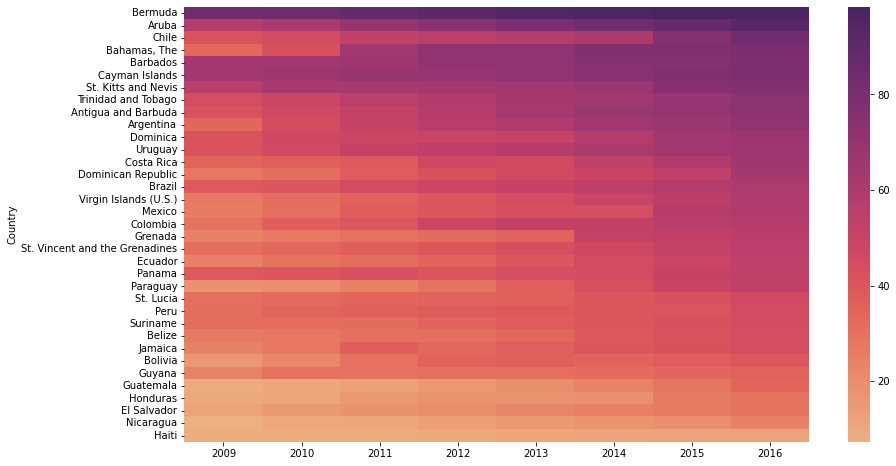

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(data_internet, cmap='flare')

### Distribuciones

1. Una distribución
2. Múltiples distribuciones

#### Una distribución

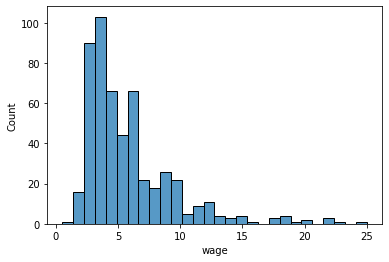

In [ ]:
sns.histplot(x=wage['wage'])

In [ ]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   wage        526 non-null    float64 
 1   educ        526 non-null    int64   
 2   exper       526 non-null    int64   
 3   tenure      526 non-null    int64   
 4   nonwhite    526 non-null    int64   
 5   female      526 non-null    object  
 6   married     526 non-null    int64   
 7   numdep      526 non-null    int64   
 8   smsa        526 non-null    int64   
 9   northcen    526 non-null    int64   
 10  south       526 non-null    int64   
 11  west        526 non-null    int64   
 12  construc    526 non-null    int64   
 13  ndurman     526 non-null    int64   
 14  trcommpu    526 non-null    int64   
 15  trade       526 non-null    int64   
 16  services    526 non-null    int64   
 17  profserv    526 non-null    int64   
 18  profocc     526 non-null    int64   
 19  clerocc 

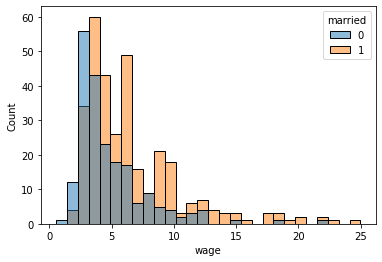

In [ ]:
sns.histplot(data=wage, x='wage', hue='married')

#### Múltiples distribuciones

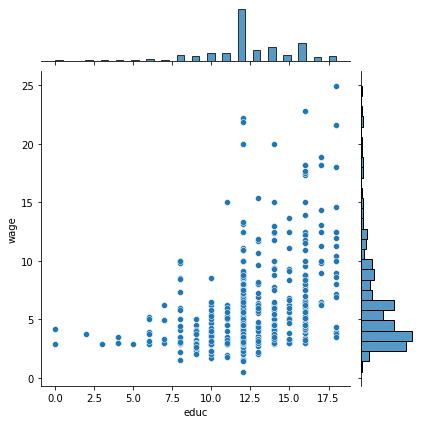

In [ ]:
sns.jointplot(y=df['wage'],x=df['educ'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


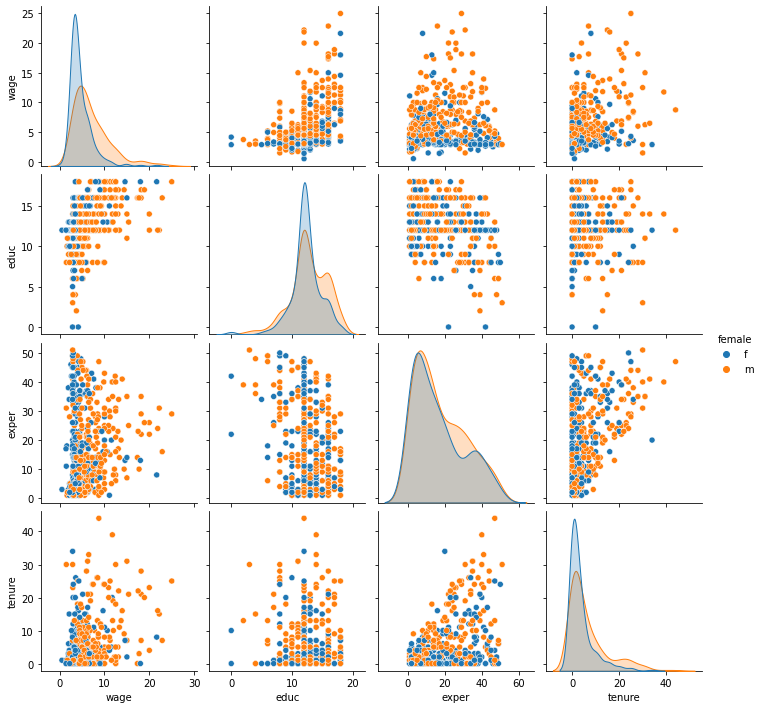

In [ ]:
#esto es también conocido como correlograma
df['female'] = wage['female']
sns.pairplot(df, hue='female')

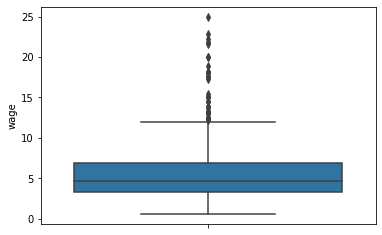

In [ ]:
sns.boxplot(data=df, y='wage')

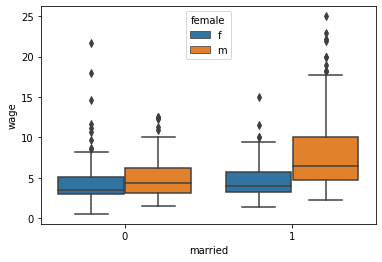

In [ ]:
sns.boxplot(data=wage, x='married', y='wage', hue='female')

### Proporciones

1. Tortas
2. Treemaps

#### Tortas

In [ ]:
fig = px.pie(values=df['female'].value_counts().values, names=df['female'].value_counts().index)
fig.show()

#### Treemaps

In [ ]:
!pip install squarify

In [ ]:
import squarify as sq

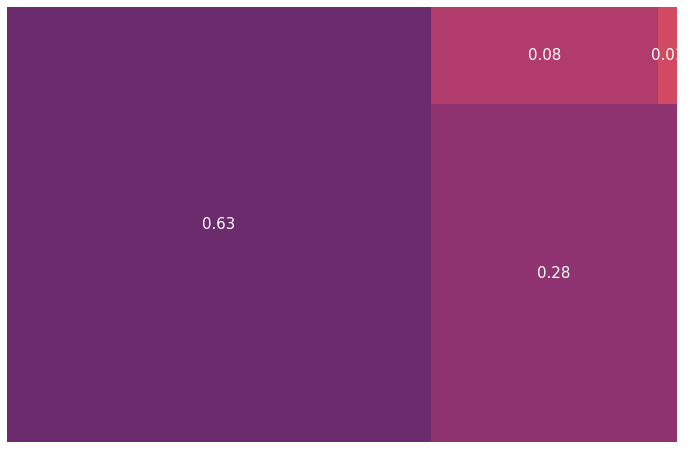

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sizes = [100, 45, 12, 1]
labels = [str(round(i/sum(sizes),2)) for i in sizes]
colors = sns.color_palette('flare')[::-1]
sq.plot(sizes=sizes, label=labels, color=colors, text_kwargs=dict(color='white', fontsize=15))
plt.axis('off')
plt.show()

In [ ]:
trade = pd.read_csv('trademap.csv').set_index('Exportadores')

In [ ]:
trade.iloc[:20]

,2016,2017,2018,2019,2020
Exportadores,,,,,
Mundo,44889367,46075705,51232805,50413025,43488662
Estados Unidos de América,11946833,12096143,13075918,12832603,10634174
China,8631421,8754463,10544729,10483257,10398882
México,3410737,3436895,3947394,3698549,2925827
Brasil,2117351,2286013,2828205,3033232,2435489
Alemania,1707682,1873998,2173253,2094922,1643891
Francia,828751,949447,1172906,1334400,958543
India,945901,1042052,1183435,1119860,936990
Japón,1115630,1231264,1288565,1174321,879124


In [ ]:
trade['2020'].iloc[1:20]

Exportadores
Estados Unidos de América    10634174
China                        10398882
México                        2925827
Brasil                        2435489
Alemania                      1643891
Francia                        958543
India                          936990
Japón                          879124
España                         798063
Ecuador                        789902
Canadá                         751137
Argentina                      724462
Perú                           680947
Italia                         679209
Corea, República de            676375
Viet Nam                       622569
Chile                          604477
Zona franca                    444593
Reino Unido                    441133
Name: 2020, dtype: int64

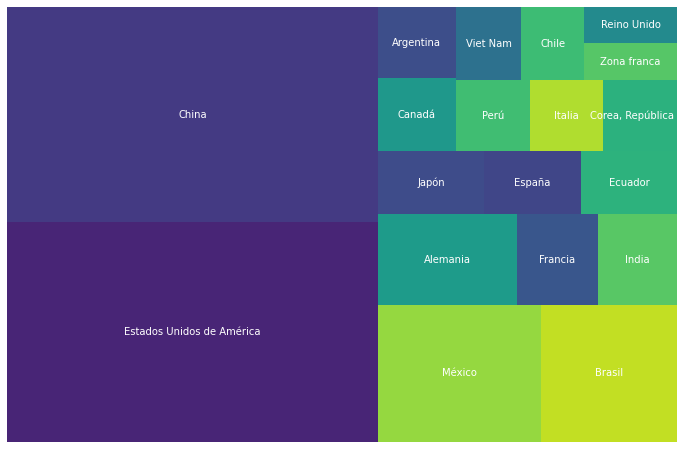

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sizes = trade['2020'].iloc[1:20].values
labels = trade['2020'].iloc[1:20].index
colors = sns.color_palette('flare')
sq.plot(sizes=sizes, label=labels, text_kwargs=dict(color='white'))
plt.axis('off')
plt.show()

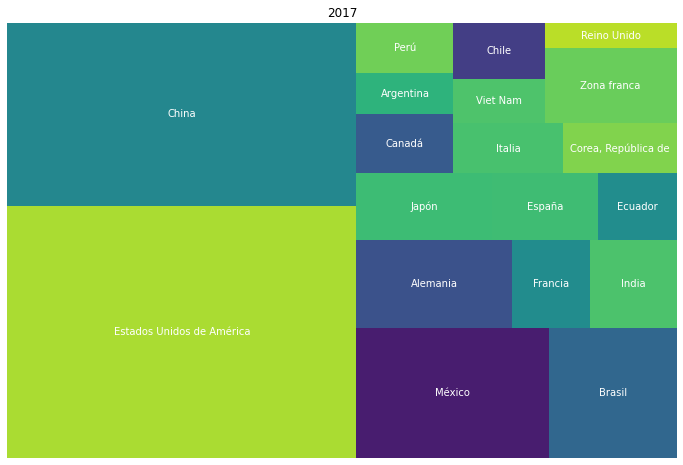

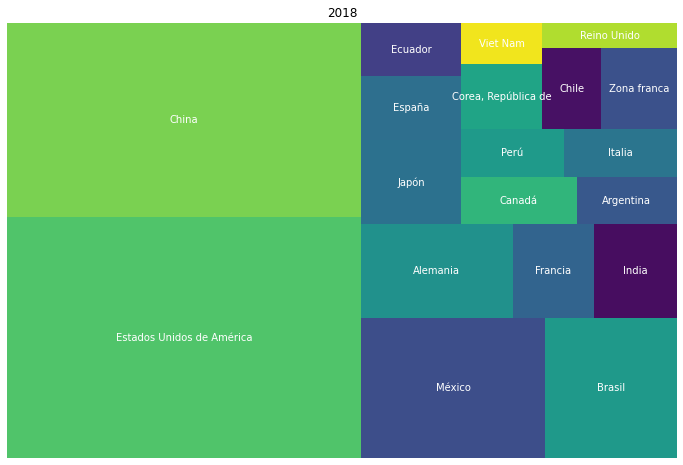

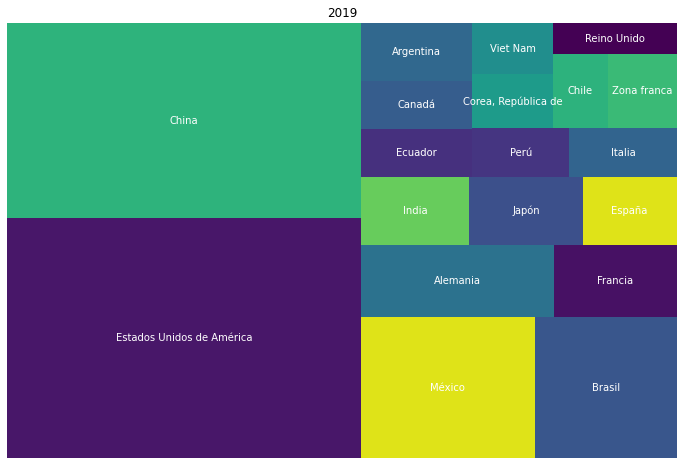

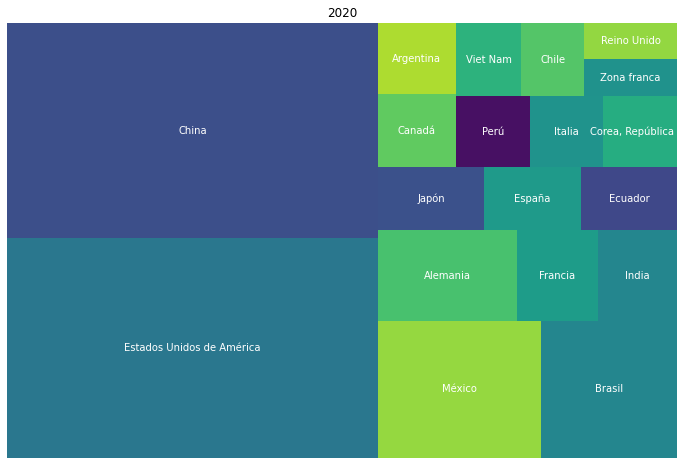

In [ ]:
for i in range(2017,2021):
  fig, ax = plt.subplots(figsize=(12,8))
  sizes = trade[str(i)].iloc[1:20].values
  labels = trade[str(i)].iloc[1:20].index
  colors = sns.color_palette('flare')
  sq.plot(sizes=sizes, label=labels, text_kwargs=dict(color='white'))
  plt.axis('off')
  plt.title(i)
  plt.show()

### Relaciones x-y
1. Gráficos de dispersión
3. Series de tiempo



####Gráficos de dispersión

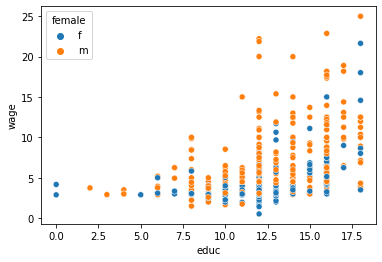

In [ ]:
sns.scatterplot(data=df, y='wage', x='educ', hue='female')

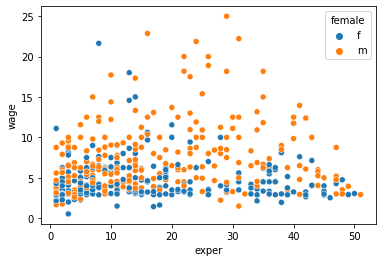

In [ ]:
sns.scatterplot(data=df, x='exper', y='wage', hue='female')

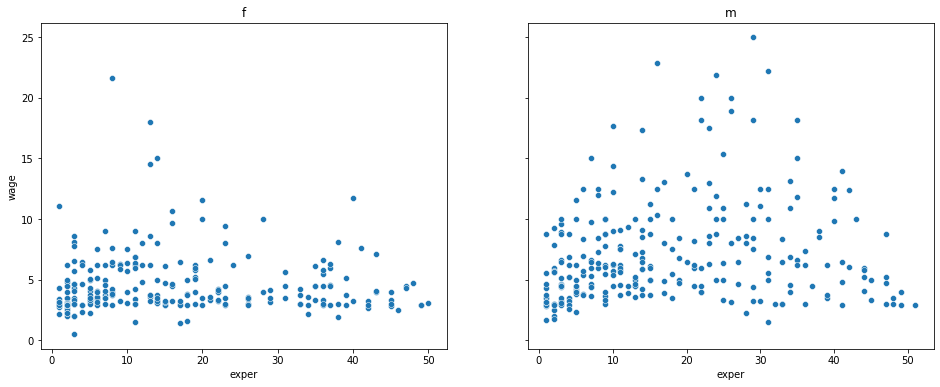

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16,6), sharey=True)
for gen, i in zip(df['female'].unique(),ax):
  i.set_title(gen)
  sns.scatterplot(data=df[df['female']==gen], x='exper', y='wage', ax=i)

#### Series de tiempo

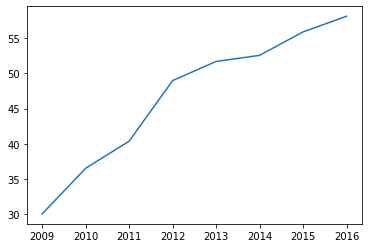

In [ ]:
data_internet.loc['Colombia'].plot()

In [ ]:
wb.search('gdp')

ID,Name,Field,Value
UZB,Uzbekistan,PPPsurveyyear,"2017 (Experimental survey for individual consumption expenditure by households), 2017 GDP PPPs and 2011 PPPs are imputed by a regression model"
ID,Name,Field,Value
AUS~SH.XPD.EXTR.ZS,Australia~External resources for health (% of total expenditure on health),Country-Series,...Such health-purpose expenditure was about US$ 2.1 billion in 2005–06 or 0.2% of GDP. The data for 2007 corresponds to the fiscal year 2007–08 starting on 01 July...
AUS~SH.XPD.OOPC.TO.ZS,Australia~Out-of-pocket health expenditure (% of total expenditure on health),Country-Series,...Such health-purpose expenditure was about US$ 2.1 billion in 2005–06 or 0.2% of GDP. The data for 2007 corresponds to the fiscal year 2007–08 starting on 01 July...
AUS~SH.XPD.OOPC.ZS,Australia~Out-of-pocket health expenditure (% of private expenditure on health),Country-Series,...Such health-purpose expenditure was about US$ 2.1 billion in 2005–06 or 0.2% of GDP. The data for 2007 corresponds to the fiscal year 2007–08 starting on 01 July...
AUS~SH.XPD.PCAP,Australia~Health expenditure per capita (current US$),Country-Series,...Such health-purpose expenditure was about US$ 2.1 billion in 2005–06 or 0.2% of GDP. The data for 2007 corresponds to the fiscal year 2007–08 starting on 01 July...
AUS~SH.XPD.PCAP.PP.KD,"Australia~Health expenditure per capita, PPP (constant 2011 international $)",Country-Series,...Such health-purpose expenditure was about US$ 2.1 billion in 2005–06 or 0.2% of GDP. The data for 2007 corresponds to the fiscal year 2007–08 starting on 01 July...
AUS~SH.XPD.PRIV,"Australia~Health expenditure, private (% of total health expenditure)",Country-Series,...Such health-purpose expenditure was about US$ 2.1 billion in 2005–06 or 0.2% of GDP. The data for 2007 corresponds to the fiscal year 2007–08 starting on 01 July...
AUS~SH.XPD.PRIV.CD,"Australia~Health expenditure, private (current US$)",Country-Series,...Such health-purpose expenditure was about US$ 2.1 billion in 2005–06 or 0.2% of GDP. The data for 2007 corresponds to the fiscal year 2007–08 starting on 01 July...
AUS~SH.XPD.PRIV.ZS,"Australia~Health expenditure, private (% of GDP)",Country-Series,...Such health-purpose expenditure was about US$ 2.1 billion in 2005–06 or 0.2% of GDP. The data for 2007 corresponds to the fiscal year 2007–08 starting on 01 July...


In [ ]:
pib_pc = wb.data.DataFrame('NY.GDP.PCAP.PP.KD',
                           time=range(1990,2017),
                           economy=wb.region.members('CLA'),
                           labels=True).reset_index(drop=True).set_index('Country').dropna().sort_values(by='YR2016', ascending=False).T
pib_pc.index = [re.findall('\d+', i)[0] for i in pib_pc.index]

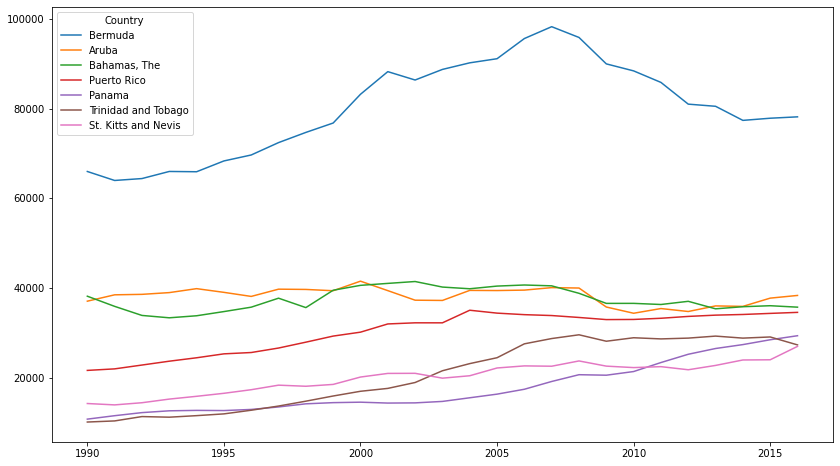

In [ ]:
pib_pc.iloc[:,:7].plot(figsize=(14,8))

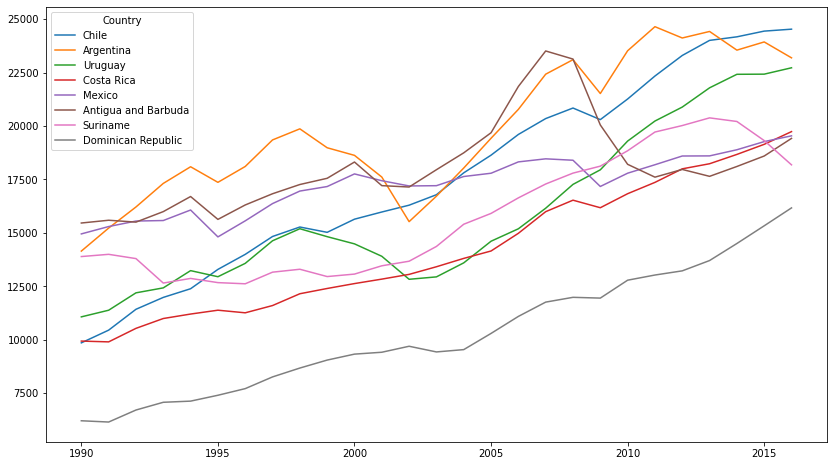

In [ ]:
pib_pc.iloc[:,7:15].plot(figsize=(14,8))

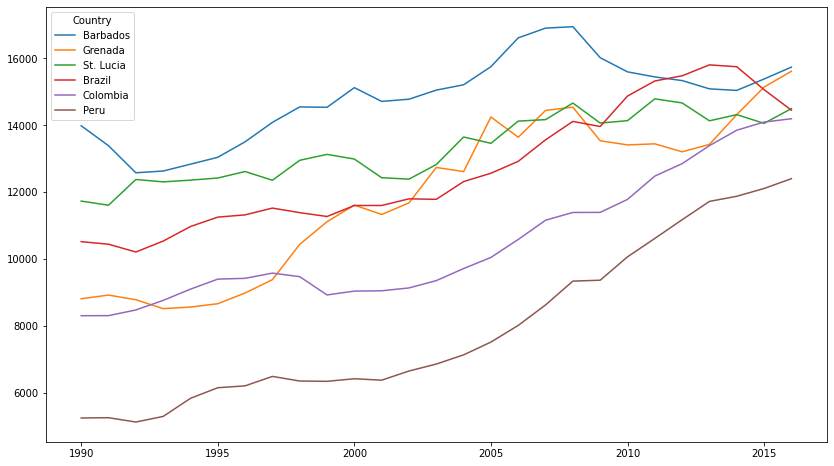

In [ ]:
pib_pc.iloc[:,15:21].plot(figsize=(14,8))

In [ ]:
df_ext = pd.read_csv('extorsiones.csv')

In [ ]:
(list(range(31))).extend([32,31])

In [ ]:
lista_indice = list(range(31))
lista_indice.extend([32,31])

In [ ]:
df_ext = df_ext.reindex(lista_indice)

In [ ]:
!pip install rarfile

In [ ]:
import rarfile
         
fantasy_rar = rarfile.RarFile('/content/MGN2020_DPTO_POLITICO.rar')
fantasy_rar.extractall('/content/')
 
fantasy_rar.close()

In [ ]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 6.3 MB 45.6 MB/s 
     |████████████████████████████████| 16.7 MB 451 kB/s 


In [ ]:
pol_dept = gpd.read_file('/content/MGN_DPTO_POLITICO.shp')

In [ ]:
pol_dept = pol_dept.sort_values(by=['DPTO_CNMBR'])

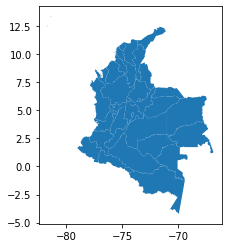

In [ ]:
pol_dept.plot()

In [ ]:
pol_dept['DPTO_CNMBR'] = pol_dept['DPTO_CNMBR'].replace({'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA':'SAN ANDRÉS',
                                                        'BOGOTÁ, D.C.':'BOGOTÁ D.C. (CT)',
                                                        'LA GUAJIRA':'GUAJIRA',
                                                        'QUINDIO':'QUINDÍO',
                                                         'VALLE DEL CAUCA':'VALLE'})

In [ ]:
pol_dept = pol_dept.sort_values(by='DPTO_CNMBR')

In [ ]:
pol_dept

,DPTO_CCDGO,DPTO_CNMBR,DPTO_NANO_,DPTO_CACTO,DPTO_NANO,SHAPE_AREA,SHAPE_LEN,geometry
7,91,AMAZONAS,1991,Dcto. 2274 del 4 de Octubre de la Constitución...,2020,8.877480,25.355977,"POLYGON ((-71.14469 0.05572, -71.14508 0.05349..."
13,05,ANTIOQUIA,1886,Constitucion Politica de 1886,2020,5.134915,21.443760,"POLYGON ((-76.41355 8.87383, -76.40465 8.85195..."
23,81,ARAUCA,1991,5 de Julio Constitucion Politica de 1991,2020,1.944157,9.124586,"POLYGON ((-70.68038 7.09393, -70.67987 7.09254..."
32,08,ATLÁNTICO,1910,Ley 21 de 1910,2020,0.273930,2.540635,"POLYGON ((-74.84946 11.09778, -74.84938 11.097..."
27,11,BOGOTÁ D.C. (CT),1538,Constitucion Politica de 1886,2020,0.132208,3.760453,"POLYGON ((-74.07419 4.83655, -74.07401 4.83647..."
17,13,BOLÍVAR,1886,Constitucion Politica de 1886,2020,2.195576,16.235823,"MULTIPOLYGON (((-75.25555 10.79960, -75.25546 ..."
24,15,BOYACÁ,1886,Constitucion Politica de 1886,2020,1.888391,15.906491,"POLYGON ((-72.17368 7.05308, -72.17277 7.05224..."
10,17,CALDAS,1905,11 de Abril de 1905,2020,0.605498,6.655844,"POLYGON ((-74.67154 5.77147, -74.67054 5.76896..."
0,18,CAQUETÁ,1981,Ley 78 del 29 de Diciembre de 1981,2020,7.318485,21.384287,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
6,85,CASANARE,1991,5 de Julio Constitucion Politica de 1991,2020,3.615063,12.132754,"POLYGON ((-72.33885 6.34471, -72.33920 6.34454..."


In [ ]:
df_ext.index = pol_dept['DPTO_CNMBR']

In [ ]:
df_ext.index.name = 'DEPARTAMENTO'

In [ ]:
pol_dept = pol_dept.drop(columns=['DPTO_CCDGO',	'DPTO_NANO_',	'DPTO_CACTO',	'DPTO_NANO','SHAPE_AREA',	'SHAPE_LEN'])

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[4.5,-74], zoom_start=5.4,min_zoom=4,max_zoom=11)
m

In [ ]:
cal = pd.read_csv('/content/sample_data/california_housing_test.csv')
cal = cal[['longitude','latitude','median_house_value']].iloc[::50]

In [ ]:
m1 = folium.Map(location=[37.37,-122.05], zoom_start=5.4,min_zoom=4,max_zoom=9)

for dato in cal.values:
  folium.Marker(location=[dato[1], dato[0]], popup=str(dato[2])).add_to(m1)

m1

In [ ]:
pol_dept = pol_dept.set_index('DPTO_CNMBR')

In [ ]:
pol_dept.index.name = 'DEPARTAMENTO'

In [ ]:
df_ext

,2013,2014,2015,2016,2017,2018,2019
DEPARTAMENTO,,,,,,,
AMAZONAS,4.0,3.0,4,6,3,3.0,2
ANTIOQUIA,911.0,521.0,664,1384,637,871.0,1179
ARAUCA,95.0,64.0,103,134,72,67.0,113
ATLÁNTICO,114.0,131.0,137,199,151,239.0,151
BOGOTÁ D.C. (CT),452.0,293.0,430,908,519,367.0,760
BOLÍVAR,131.0,200.0,161,198,171,228.0,184
BOYACÁ,161.0,107.0,77,182,88,65.0,193
CALDAS,73.0,80.0,52,103,58,54.0,100
CAQUETÁ,148.0,88.0,107,150,109,58.0,134


In [ ]:
folium.Choropleth(
    geo_data=pol_dept.__geo_interface__,
    data=df_ext['2013'],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Extorsión",
).add_to(m)


In [ ]:
m

## Bibliografía

Wilke, C. O.(2019). Fundamentals of Data Visualization. O'Reilly.

